# **Modulo descriptivo**







Primero, cargamos los datos los cuales se encuentran almacenados en la base de datos="FreeSqlDataBase" usando MySql

In [ ]:
!pip install mysql-connector pandas

import mysql.connector
import pandas as pd

# Conexión a la base de datos
conn = mysql.connector.connect(
    host="sql10.freesqldatabase.com",
    user="sql10617343",
    password="37AKABTRf1",
    database="sql10617343"
)

# Crear un objeto cursor y ejecutar la consulta
mycursor = conn.cursor()
mycursor.execute("SELECT * FROM DataSet")

# Obtener los resultados de la consulta y crear un DataFrame con pandas
data = pd.DataFrame(mycursor.fetchall(), columns=mycursor.column_names)

# Mostrar la tabla
data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Pais,Departamento,Ciudad,Empresa,Finca,Agricultor,Planta,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio
0,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,1,78,2173,5,56,8,40,26,28,31
1,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,27,59,1957,8,43,8,19,28,34,32
2,Colombia,Antioquia,Jardin,FederacionNacionaldeCafeteros,ElHuerto,YamithRodriguez,Cafe,20,0,1841,3,33,7,23,10,30,38
3,Colombia,Antioquia,Jerico,FederacionNacionaldeCafeteros,ElDescanso,OscarBoada,Cafe,28,58,1660,10,63,7,48,12,32,44
4,Colombia,Antioquia,Fredonia,FederacionNacionaldeCafeteros,LasMargaritas,OrlandoCastañeda,Cafe,29,55,1775,1,58,5,14,29,23,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Colombia,Risaralda,Quinchia,FederacionNacionaldeCafeteros,LosOlmos,JairoGarcia,Cafe,20,70,1958,4,70,6,46,25,30,20
223,Colombia,Risaralda,Dosquebradas,FederacionNacionaldeCafeteros,LosAguilones,EucarioChaparro,Cafe,20,57,1768,9,50,5,36,31,37,29
224,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,27,65,2056,10,46,5,45,22,32,39
225,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,30,54,1711,1,41,8,29,36,33,28


Una vez cargado y mostrado el DataSet, procedemos a mirar el tipo de variable que contiene cada columna para futuras acciones:


In [ ]:
data.dtypes

Pais            object
Departamento    object
Ciudad          object
Empresa         object
Finca           object
Agricultor      object
Planta          object
Temperatura      int64
Humedad          int64
Altitud          int64
Radiacion        int64
Textura          int64
Ph               int64
Agua             int64
Nitrogeno        int64
Fosforo          int64
Potasio          int64
dtype: object

Una vez analizado el tipo de variable , procedemos a buscar valores nulos, ya que estos pueden diferir en el analisis.

In [ ]:

data.isnull().sum()


Pais            0
Departamento    0
Ciudad          0
Empresa         0
Finca           0
Agricultor      0
Planta          0
Temperatura     0
Humedad         0
Altitud         0
Radiacion       0
Textura         0
Ph              0
Agua            0
Nitrogeno       0
Fosforo         0
Potasio         0
dtype: int64

En caso tal de que encontremos valores nulos , procedemos a eliminar la fila donde este se encuentre para una mejor precision a la hora del analiss

In [ ]:
data = data.dropna(axis=0, how='any')
data

,Pais,Departamento,Ciudad,Empresa,Finca,Agricultor,Planta,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio
0,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,1,78,2173,5,56,8,40,26,28,31
1,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,27,59,1957,8,43,8,19,28,34,32
2,Colombia,Antioquia,Jardin,FederacionNacionaldeCafeteros,ElHuerto,YamithRodriguez,Cafe,20,0,1841,3,33,7,23,10,30,38
3,Colombia,Antioquia,Jerico,FederacionNacionaldeCafeteros,ElDescanso,OscarBoada,Cafe,28,58,1660,10,63,7,48,12,32,44
4,Colombia,Antioquia,Fredonia,FederacionNacionaldeCafeteros,LasMargaritas,OrlandoCastañeda,Cafe,29,55,1775,1,58,5,14,29,23,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Colombia,Risaralda,Quinchia,FederacionNacionaldeCafeteros,LosOlmos,JairoGarcia,Cafe,20,70,1958,4,70,6,46,25,30,20
223,Colombia,Risaralda,Dosquebradas,FederacionNacionaldeCafeteros,LosAguilones,EucarioChaparro,Cafe,20,57,1768,9,50,5,36,31,37,29
224,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,27,65,2056,10,46,5,45,22,32,39
225,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,30,54,1711,1,41,8,29,36,33,28


Luego seguimos con los valores atípicos, podemos utilizar varias técnicas, como el método de las desviaciones estándar o el método de los percentiles. Una vez encontrados estos valores atípicos  su fila sera eliminada para un analisis coherente

In [ ]:
# identificar las 10 columnas que deseas analizar
columnas = ['Temperatura', 'Humedad', 'Altitud', 'Radiacion', 'Textura', 'Ph', 'Agua', 'Nitrogeno', 'Fosforo', 'Potasio']
# calcular los valores estadísticos clave para cada columna
estadisticas = data[columnas].describe()


# calcular los límites para cada columna utilizando el método de los 3 sigma
limites_inferiores = estadisticas.loc['mean'] - 3 * estadisticas.loc['std']
limites_superiores = estadisticas.loc['mean'] + 3 * estadisticas.loc['std']

# reemplazar o eliminar los valores atípicos en cada columna
for columna in columnas:
    data[columna] = data[columna].apply(lambda x: estadisticas[columna]['mean'] if x < limites_inferiores[columna] or x > limites_superiores[columna] else x)
data


,Pais,Departamento,Ciudad,Empresa,Finca,Agricultor,Planta,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio
0,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,25.079295,78.000000,2173,5,56,8,40,26,28,31
1,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,27.000000,59.000000,1957,8,43,8,19,28,34,32
2,Colombia,Antioquia,Jardin,FederacionNacionaldeCafeteros,ElHuerto,YamithRodriguez,Cafe,20.000000,64.321586,1841,3,33,7,23,10,30,38
3,Colombia,Antioquia,Jerico,FederacionNacionaldeCafeteros,ElDescanso,OscarBoada,Cafe,28.000000,58.000000,1660,10,63,7,48,12,32,44
4,Colombia,Antioquia,Fredonia,FederacionNacionaldeCafeteros,LasMargaritas,OrlandoCastañeda,Cafe,29.000000,55.000000,1775,1,58,5,14,29,23,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Colombia,Risaralda,Quinchia,FederacionNacionaldeCafeteros,LosOlmos,JairoGarcia,Cafe,20.000000,70.000000,1958,4,70,6,46,25,30,20
223,Colombia,Risaralda,Dosquebradas,FederacionNacionaldeCafeteros,LosAguilones,EucarioChaparro,Cafe,20.000000,57.000000,1768,9,50,5,36,31,37,29
224,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,27.000000,65.000000,2056,10,46,5,45,22,32,39
225,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,30.000000,54.000000,1711,1,41,8,29,36,33,28


Una vez tengamos nuestro DataSet limpio y con valores coherentes, miraremos el tipo de varibales de cada columna , para luego poder hacer operaciones o graficos con estas variables

In [ ]:
columnas = ['Temperatura', 'Humedad', 'Altitud', 'Radiacion', 'Textura', 'Ph', 'Agua', 'Nitrogeno', 'Fosforo', 'Potasio']

# convertir las columnas al tipo de datos deseado
data[columnas] = data[columnas].astype('int')
data

,Pais,Departamento,Ciudad,Empresa,Finca,Agricultor,Planta,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio
0,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,25,78,2173,5,56,8,40,26,28,31
1,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,27,59,1957,8,43,8,19,28,34,32
2,Colombia,Antioquia,Jardin,FederacionNacionaldeCafeteros,ElHuerto,YamithRodriguez,Cafe,20,64,1841,3,33,7,23,10,30,38
3,Colombia,Antioquia,Jerico,FederacionNacionaldeCafeteros,ElDescanso,OscarBoada,Cafe,28,58,1660,10,63,7,48,12,32,44
4,Colombia,Antioquia,Fredonia,FederacionNacionaldeCafeteros,LasMargaritas,OrlandoCastañeda,Cafe,29,55,1775,1,58,5,14,29,23,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Colombia,Risaralda,Quinchia,FederacionNacionaldeCafeteros,LosOlmos,JairoGarcia,Cafe,20,70,1958,4,70,6,46,25,30,20
223,Colombia,Risaralda,Dosquebradas,FederacionNacionaldeCafeteros,LosAguilones,EucarioChaparro,Cafe,20,57,1768,9,50,5,36,31,37,29
224,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,27,65,2056,10,46,5,45,22,32,39
225,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,30,54,1711,1,41,8,29,36,33,28


Con el siguiente codigo , podemos generar un resumen estadístico de el DataSet, dando los siguintes resultados=

count: el número de valores no faltantes en la columna

mean: la media de la columna

std: la desviación estándar de la columna

min: el valor mínimo en la columna

25%: el percentil 25 (el valor por debajo del cual se encuentra el 25% de los datos) de la columna

50%: el percentil 50 (la mediana o valor medio) de la columna

75%: el percentil 75 (el valor por debajo del cual se encuentra el 75% de los datos) de la columna

max: el valor máximo en la columna

In [ ]:
data.describe()

,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,25.185022,64.603524,1838.533040,5.740088,48.696035,6.537445,28.361233,26.933921,26.955947,27.726872
std,3.212413,8.905183,195.029615,2.959659,11.715285,1.117899,13.400630,10.512110,9.925733,10.387421
min,20.000000,50.000000,1501.000000,1.000000,30.000000,5.000000,5.000000,10.000000,10.000000,10.000000
25%,22.000000,56.500000,1661.000000,3.000000,39.000000,6.000000,17.000000,17.000000,19.000000,19.000000
50%,25.000000,64.000000,1823.000000,6.000000,48.000000,7.000000,28.000000,27.000000,27.000000,28.000000
75%,28.000000,72.000000,1996.500000,8.000000,59.000000,8.000000,40.000000,36.000000,35.000000,36.000000
max,30.000000,80.000000,2198.000000,11.000000,70.000000,8.000000,50.000000,45.000000,45.000000,45.000000


Para analizar la frecuencia con la que ocurren ciertos valores o eventos en una variable, podemos usar el método value_counts() de pandas. Por ejemplo, para analizar la frecuencia con la que ocurre cada valor en todas las columnas, podemos usar el siguiente código:


In [ ]:
#data['Finca'].value_counts()
variables = ['Temperatura', 'Humedad', 'Altitud', 'Radiacion', 'Textura', 'Ph', 'Agua', 'Nitrogeno', 'Fosforo', 'Potasio']
for variable in variables:
    counts = data[variable].value_counts()
    print(f"Conteo de valores únicos para la variable {variable}:")
    df = pd.DataFrame(counts)
    df = df.reset_index()
    df.columns = [variable, 'Frecuencia']
    display(df)


Conteo de valores únicos para la variable Temperatura:


,Temperatura,Frecuencia
0,28,25
1,20,24
2,25,23
3,29,23
4,27,22
5,30,21
6,26,19
7,24,18
8,23,18
9,21,17


Conteo de valores únicos para la variable Humedad:


,Humedad,Frecuencia
0,57,12
1,56,12
2,79,11
3,68,11
4,75,10
5,54,9
6,64,9
7,55,9
8,53,9
9,69,8


Conteo de valores únicos para la variable Altitud:


,Altitud,Frecuencia
0,1911,3
1,1823,2
2,2008,2
3,2171,2
4,1560,2
...,...,...
193,2094,1
194,1566,1
195,1797,1
196,1927,1


Conteo de valores únicos para la variable Radiacion:


,Radiacion,Frecuencia
0,6,26
1,9,26
2,3,25
3,8,24
4,4,23
5,5,21
6,2,20
7,1,19
8,7,17
9,10,15


Conteo de valores únicos para la variable Textura:


,Textura,Frecuencia
0,35,10
1,46,10
2,52,10
3,39,10
4,31,8
5,59,8
6,69,8
7,41,8
8,30,7
9,42,7


Conteo de valores únicos para la variable Ph:


,Ph,Frecuencia
0,8,60
1,6,59
2,7,55
3,5,53


Conteo de valores únicos para la variable Agua:


,Agua,Frecuencia
0,48,12
1,28,9
2,43,9
3,42,8
4,22,8
5,23,7
6,37,7
7,33,6
8,11,6
9,46,6


Conteo de valores únicos para la variable Nitrogeno:


,Nitrogeno,Frecuencia
0,16,12
1,14,11
2,28,10
3,29,10
4,25,8
5,13,8
6,44,8
7,40,8
8,24,8
9,15,8


Conteo de valores únicos para la variable Fosforo:


,Fosforo,Frecuencia
0,27,12
1,28,10
2,21,10
3,22,10
4,13,10
5,26,9
6,32,9
7,10,9
8,41,8
9,23,8


Conteo de valores únicos para la variable Potasio:


,Potasio,Frecuencia
0,32,15
1,17,13
2,12,12
3,42,11
4,39,11
5,36,11
6,21,9
7,34,9
8,25,9
9,14,8


Para analizar las tendencias en los datos a lo largo del tiempo, podemos utilizar gráficos de series temporales. Por ejemplo, si queremos visualizar la tendencia de la temperatura a lo largo del tiempo, podemos usar el siguiente código:

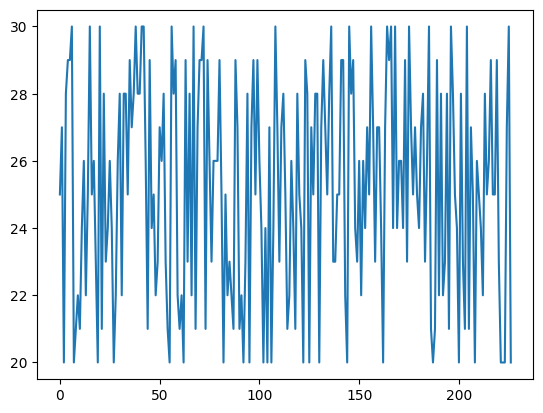

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data['Temperatura'])
plt.show()


Para analizar la correlación entre diferentes variables en los datos, podemos utilizar el método corr() de pandas. Por ejemplo, para analizar la correlación entre la temperatura y la humedad, podemos usar el siguiente código:




In [ ]:
data[['Temperatura', 'Humedad']].corr()


,Temperatura,Humedad
Temperatura,1.00000,-0.01382
Humedad,-0.01382,1.00000


Para visualizar los datos, podemos utilizar gráficos, tablas y diagramas. Por ejemplo, para visualizar la frecuencia con la que ocurre cada valor en la columna 'Temperatura', podemos usar el siguiente código:


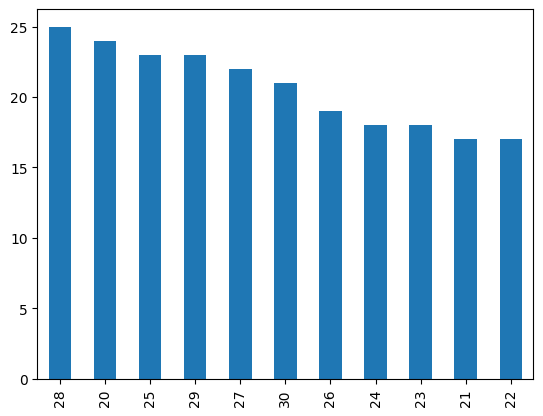

In [ ]:
data['Temperatura'].value_counts().plot(kind='bar')
plt.show()


Aquí hay un ejemplo de cómo crear un gráfico de barras para comparar los valores promedio de cada variable en diferentes ubicaciones geográficas:

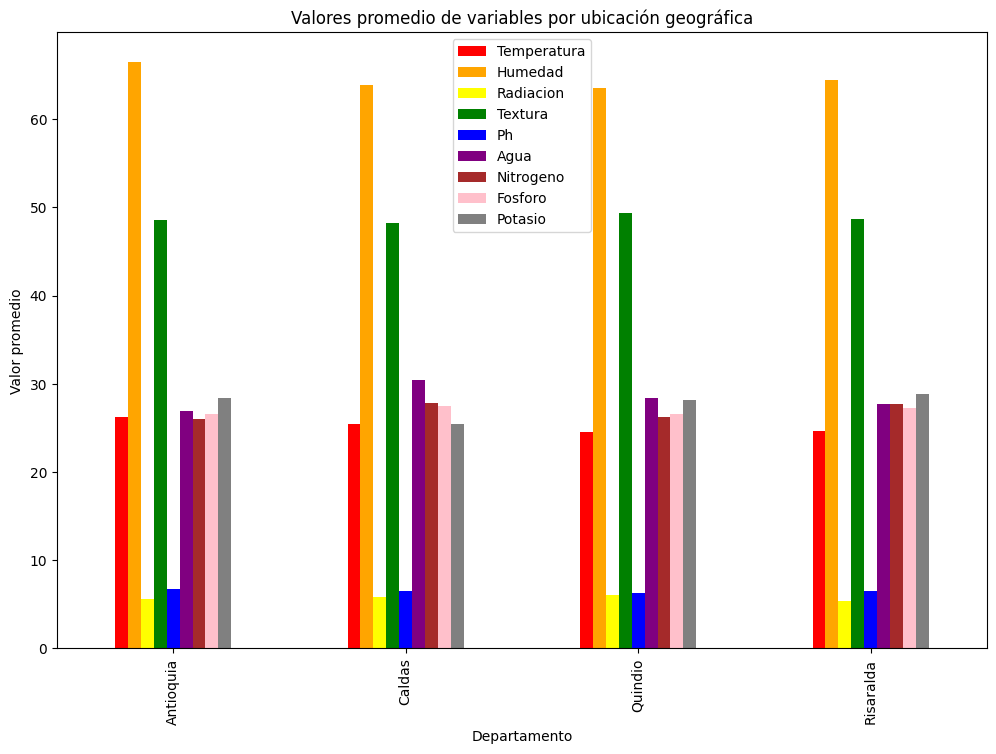

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


# agrupar los datos por ubicación geográfica y calcular los valores promedio
data_promedio = data.groupby('Departamento')[['Temperatura', 'Humedad',  'Radiacion', 'Textura', 'Ph', 'Agua', 'Nitrogeno', 'Fosforo', 'Potasio']].mean()
mpl.rcParams['figure.figsize'] = (12, 8)
colores = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'pink', 'gray']

# crear un gráfico de barras para visualizar los valores promedio de cada variable por ubicación geográfica
data_promedio.plot(kind='bar', color=colores)
plt.xlabel('Departamento')
plt.ylabel('Valor promedio')
plt.title('Valores promedio de variables por ubicación geográfica')
plt.show()

El siguiente codigo crea un gráfico de caja y bigotes para visualizar la distribución de Temperatura en diferentes Departamentos

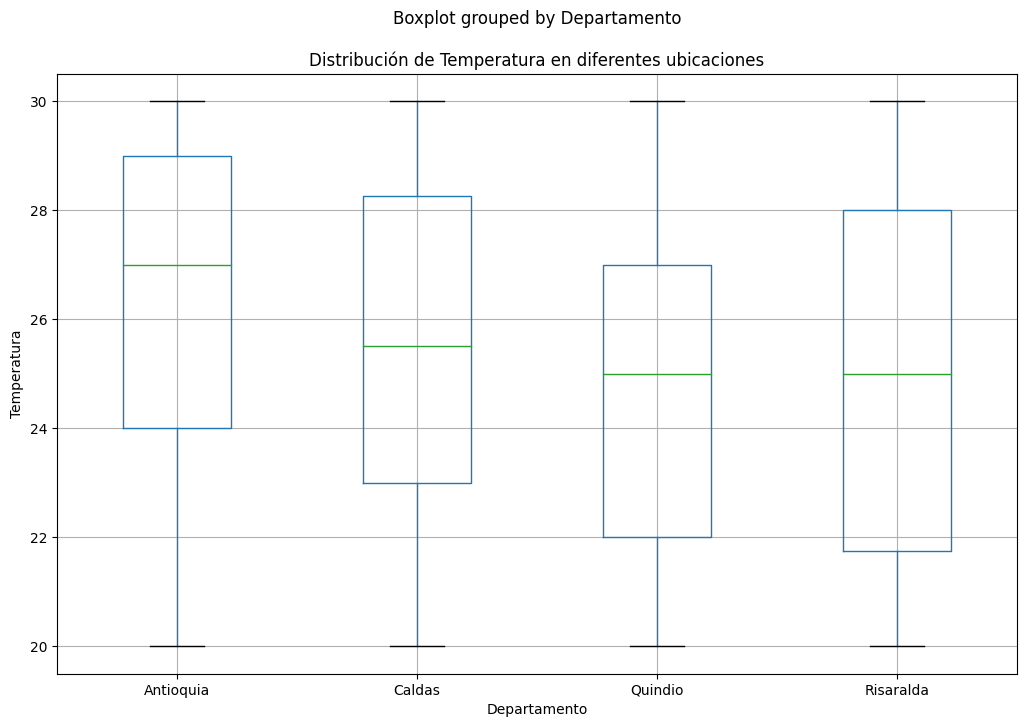

In [ ]:


data.boxplot(column='Temperatura', by='Departamento')
plt.xlabel('Departamento')
plt.ylabel('Temperatura')
plt.title('Distribución de Temperatura en diferentes ubicaciones')
plt.show()



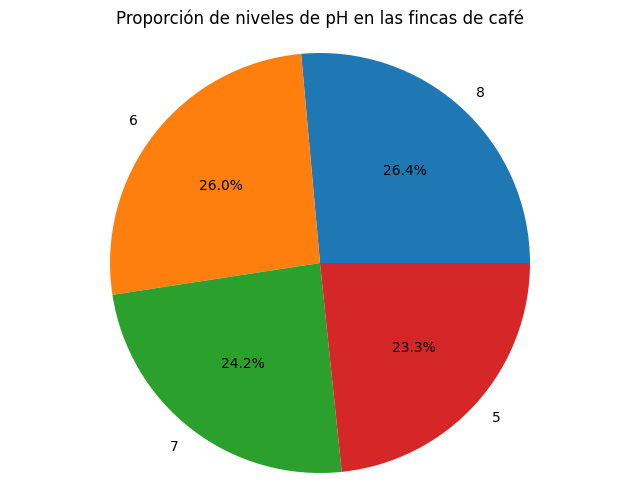

In [ ]:
import matplotlib.pyplot as plt

# Obtener los niveles de pH y contar su frecuencia
pH_levels = data['Ph']
pH_counts = pH_levels.value_counts()

# Crear un gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(pH_counts, labels=pH_counts.index, autopct='%1.1f%%')
plt.title("Proporción de niveles de pH en las fincas de café")
plt.axis('equal')
plt.show()



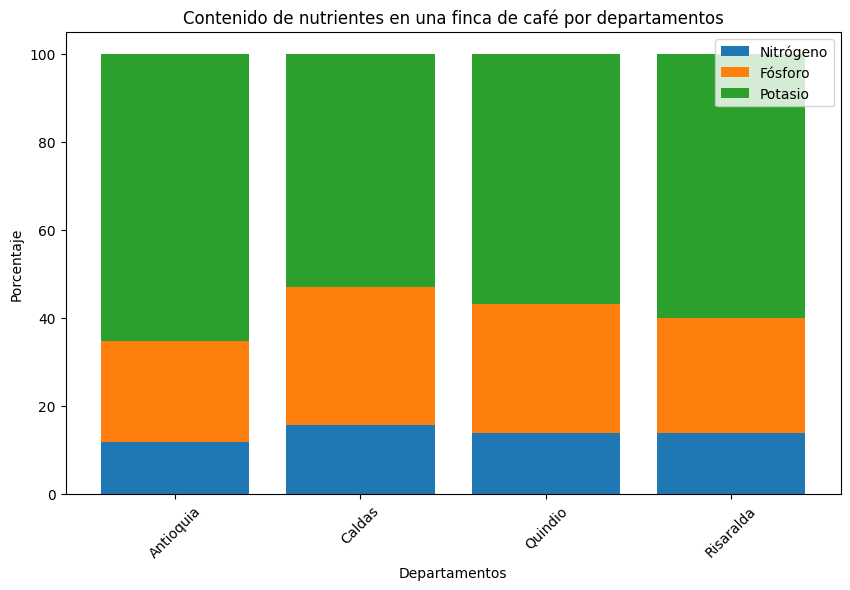

In [ ]:
import matplotlib.pyplot as plt

# Obtener los valores de nutrientes en la finca de café
nitrogen = data['Nitrogeno']
phosphorus = data['Fosforo']
potassium = data['Potasio']

# Calcular los porcentajes
total = nitrogen + phosphorus + potassium
nitrogen_pct = (nitrogen / total) * 100
phosphorus_pct = (phosphorus / total) * 100
potassium_pct = (potassium / total) * 100

# Crear un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
plt.bar(data['Departamento'], nitrogen_pct, label='Nitrógeno')
plt.bar(data['Departamento'], phosphorus_pct, bottom=nitrogen_pct, label='Fósforo')
plt.bar(data['Departamento'], potassium_pct, bottom=nitrogen_pct+phosphorus_pct, label='Potasio')
plt.xlabel('Departamentos')
plt.ylabel('Porcentaje')
plt.title('Contenido de nutrientes en una finca de café por departamentos')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Otra manera de visualizar los datos y hacer un analisis de los datos es de la siguiente manera:

In [ ]:
'''!pip install dtale
import dtale
import dtale.app  as dtale_app
dtale_app.USE_COLAB=True
'''

'!pip install dtale\nimport dtale\nimport dtale.app  as dtale_app\ndtale_app.USE_COLAB=True\n'

In [ ]:
'''d =dtale.show(data)
d'''

'd =dtale.show(data)\nd'

# **Modulo predictivo**



In [ ]:
data

,Pais,Departamento,Ciudad,Empresa,Finca,Agricultor,Planta,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio
0,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,25,78,2173,5,56,8,40,26,28,31
1,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,27,59,1957,8,43,8,19,28,34,32
2,Colombia,Antioquia,Jardin,FederacionNacionaldeCafeteros,ElHuerto,YamithRodriguez,Cafe,20,64,1841,3,33,7,23,10,30,38
3,Colombia,Antioquia,Jerico,FederacionNacionaldeCafeteros,ElDescanso,OscarBoada,Cafe,28,58,1660,10,63,7,48,12,32,44
4,Colombia,Antioquia,Fredonia,FederacionNacionaldeCafeteros,LasMargaritas,OrlandoCastañeda,Cafe,29,55,1775,1,58,5,14,29,23,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Colombia,Risaralda,Quinchia,FederacionNacionaldeCafeteros,LosOlmos,JairoGarcia,Cafe,20,70,1958,4,70,6,46,25,30,20
223,Colombia,Risaralda,Dosquebradas,FederacionNacionaldeCafeteros,LosAguilones,EucarioChaparro,Cafe,20,57,1768,9,50,5,36,31,37,29
224,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,27,65,2056,10,46,5,45,22,32,39
225,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,30,54,1711,1,41,8,29,36,33,28


In [ ]:
dataNumerico = data.drop(['Pais','Departamento', 'Ciudad', 'Empresa', 'Finca', 'Agricultor', 'Planta'], axis=1)

In [ ]:
dataNumerico.head(20)

,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio
0,25,78,2173,5,56,8,40,26,28,31
1,27,59,1957,8,43,8,19,28,34,32
2,20,64,1841,3,33,7,23,10,30,38
3,28,58,1660,10,63,7,48,12,32,44
4,29,55,1775,1,58,5,14,29,23,34
5,29,69,1648,1,33,8,48,14,27,30
6,30,71,1907,6,39,6,31,14,27,43
7,20,75,1800,1,65,7,21,28,30,22
8,21,80,1937,6,38,8,38,38,36,11
9,22,61,1895,8,31,5,30,37,15,43


In [ ]:
import pandas as pd

# Crear la variable Riesgo basada en los criterios definidos
RiesgoTemperatura = []
RiesgoHumedad = []
RiesgoAltitud = []
RiesgoRadiacion = []
RiesgoTextura = []
RiesgoPh = []
RiesgoAgua = []
RiesgoNitrogeno = []
RiesgoFosforo = []
RiesgoPotasio = []

for i in range(len(dataNumerico)):
    Temperatura = dataNumerico.loc[i, 'Temperatura']
    Humedad = dataNumerico.loc[i, 'Humedad']
    Altitud = dataNumerico.loc[i, 'Altitud']
    Radiacion = dataNumerico.loc[i, 'Radiacion']
    Textura = dataNumerico.loc[i, 'Textura']
    Ph = dataNumerico.loc[i, 'Ph']
    Agua = dataNumerico.loc[i, 'Agua']
    Nitrogeno = dataNumerico.loc[i, 'Nitrogeno']
    Fosforo = dataNumerico.loc[i, 'Fosforo']
    Potasio = dataNumerico.loc[i, 'Potasio']

    if Temperatura > 32 :
        RiesgoTemperatura.append('Riesgo Inminente')
    elif Temperatura < 16 :
        RiesgoTemperatura.append('Riesgo Medio')
    else:
        RiesgoTemperatura.append('Sin Riesgo')


    if Humedad > 90 :
        RiesgoHumedad.append('Riesgo Inminente')
    elif Humedad < 30 :
        RiesgoHumedad.append('Riesgo Medio')
    else:
        RiesgoHumedad.append('Sin Riesgo')

    if Altitud > 2500:
      RiesgoAltitud.append('Riesgo Inminente')
    elif Altitud < 800:
      RiesgoAltitud.append('Riesgo Medio')
    else:
      RiesgoAltitud.append('Sin Riesgo')

    if Radiacion > 10:
      RiesgoRadiacion.append('Riesgo Inminente')
    elif Radiacion < 4:
      RiesgoRadiacion.append('Riesgo Medio')
    else:
      RiesgoRadiacion.append('Sin Riesgo')

    if Textura == 'Arcillosa':
      RiesgoTextura.append('Riesgo Inminente')
    elif Textura == 'Franco Arcillosa' or Textura == 'Franco Limosa':
      RiesgoTextura.append('Riesgo Medio')
    else:
      RiesgoTextura.append('Sin Riesgo')

    if Ph < 5.5 or Ph > 9.1:
      RiesgoPh.append('Riesgo Inminente')
    elif Ph < 6.0 or Ph > 8.1:
      RiesgoPh.append('Riesgo Medio')
    else:
      RiesgoPh.append('Sin Riesgo')

    if Agua < 20:
      RiesgoAgua.append('Riesgo Inminente')
    elif Agua > 50:
      RiesgoAgua.append('Riesgo Medio')
    else:
      RiesgoAgua.append('Sin Riesgo')

    if Nitrogeno < 20 :
        RiesgoNitrogeno.append('Riesgo Inminente')
    elif Nitrogeno > 35 :
        RiesgoNitrogeno.append('Riesgo Medio')
    else:
        RiesgoNitrogeno.append('Sin Riesgo')

    if Fosforo < 20 :
        RiesgoFosforo.append('Riesgo Inminente')
    elif Fosforo > 35 :
        RiesgoFosforo.append('Riesgo Medio')
    else:
        RiesgoFosforo.append('Sin Riesgo')

    if Potasio < 20 :
        RiesgoPotasio.append('Riesgo Inminente')
    elif Potasio > 35 :
        RiesgoPotasio.append('Riesgo Medio')
    else:
        RiesgoPotasio.append('Sin Riesgo')


# Asignar la variable Riesgo al conjunto de datos original
dataNumerico['RiesgoTemperatura'] = RiesgoTemperatura
dataNumerico['RiesgoHumedad'] = RiesgoHumedad
dataNumerico['RiesgoAltitud'] = RiesgoAltitud
dataNumerico['RiesgoRadiacion'] = RiesgoRadiacion
dataNumerico['RiesgoTextura'] = RiesgoTextura
dataNumerico['RiesgoPh'] = RiesgoPh
dataNumerico['RiesgoAgua'] = RiesgoAgua
dataNumerico['RiesgoNitrogeno'] = RiesgoNitrogeno
dataNumerico['RiesgoFosforo'] = RiesgoFosforo
dataNumerico['RiesgoPotasio'] = RiesgoAgua

# Guardar los resultados en un nuevo archivo CSV
dataNumerico.to_csv('archivo_con_riesgo.csv', index=False)
dataNumerico

,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio,RiesgoTemperatura,RiesgoHumedad,RiesgoAltitud,RiesgoRadiacion,RiesgoTextura,RiesgoPh,RiesgoAgua,RiesgoNitrogeno,RiesgoFosforo,RiesgoPotasio
0,25,78,2173,5,56,8,40,26,28,31,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo
1,27,59,1957,8,43,8,19,28,34,32,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Riesgo Inminente,Sin Riesgo,Sin Riesgo,Riesgo Inminente
2,20,64,1841,3,33,7,23,10,30,38,Sin Riesgo,Sin Riesgo,Sin Riesgo,Riesgo Medio,Sin Riesgo,Sin Riesgo,Sin Riesgo,Riesgo Inminente,Sin Riesgo,Sin Riesgo
3,28,58,1660,10,63,7,48,12,32,44,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Riesgo Inminente,Sin Riesgo,Sin Riesgo
4,29,55,1775,1,58,5,14,29,23,34,Sin Riesgo,Sin Riesgo,Sin Riesgo,Riesgo Medio,Sin Riesgo,Riesgo Inminente,Riesgo Inminente,Sin Riesgo,Sin Riesgo,Riesgo Inminente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,20,70,1958,4,70,6,46,25,30,20,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo
223,20,57,1768,9,50,5,36,31,37,29,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Riesgo Inminente,Sin Riesgo,Sin Riesgo,Riesgo Medio,Sin Riesgo
224,27,65,2056,10,46,5,45,22,32,39,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo,Riesgo Inminente,Sin Riesgo,Sin Riesgo,Sin Riesgo,Sin Riesgo
225,30,54,1711,1,41,8,29,36,33,28,Sin Riesgo,Sin Riesgo,Sin Riesgo,Riesgo Medio,Sin Riesgo,Sin Riesgo,Sin Riesgo,Riesgo Medio,Sin Riesgo,Sin Riesgo


In [ ]:
import mysql.connector
import numpy as np

# Establecer la conexión con la base de datos
cnx = mysql.connector.connect(user='sql10617343', password='37AKABTRf1',
                              host='sql10.freesqldatabase.com', database='sql10617343')
cursor = cnx.cursor()

# Truncar la tabla
truncate_query = '''
TRUNCATE TABLE DataSet_Riesgos
'''
cursor.execute(truncate_query)

# Insertar nuevos datos
for i in range(len(dataNumerico)):
    insert_query = '''
    INSERT INTO DataSet_Riesgos (
        Temperatura, Humedad, Altitud, Radiacion, Textura, Ph, Agua,
        Nitrogeno, Fosforo, Potasio, RiesgoTemperatura, RiesgoHumedad,
        RiesgoAltitud, RiesgoRadiacion, RiesgoTextura, RiesgoPh, RiesgoAgua,
        RiesgoNitrogeno, RiesgoFosforo, RiesgoPotasio
    ) VALUES (
        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
    )
    '''
    values = tuple(map(lambda x: int(x) if isinstance(x, np.int64) else x, dataNumerico.loc[i]))
    cursor.execute(insert_query, values)

# Confirmar los cambios y cerrar la conexión
cnx.commit()
cursor.close()
cnx.close()


In [ ]:
# Crear una nueva columna "Riesgo" inicializada como "Sin Riesgo"
dataNumerico['Riesgo'] = 'Sin Riesgo'

# Marcar como "Riesgo Inminente" aquellos registros que cumplen alguna condición de riesgo inminente
dataNumerico.loc[(dataNumerico['RiesgoTemperatura'] == 'Riesgo Inminente') |
         (dataNumerico['RiesgoHumedad'] == 'Riesgo Inminente') |
         (dataNumerico['RiesgoAltitud'] == 'Riesgo Inminente') |
         (dataNumerico['RiesgoRadiacion'] == 'Riesgo Inminente') |
         (dataNumerico['RiesgoTextura'] == 'Riesgo Inminente') |
         (dataNumerico['RiesgoPh'] == 'Riesgo Inminente') |
         (dataNumerico['RiesgoAgua'] == 'Riesgo Inminente') |
         (dataNumerico['RiesgoNitrogeno'] == 'Riesgo Inminente') |
         (dataNumerico['RiesgoFosforo'] == 'Riesgo Inminente') |
         (dataNumerico['RiesgoPotasio'] == 'Riesgo Inminente'), 'Riesgo'] = 'Riesgo Inminente'

# Marcar como "Riesgo Medio" aquellos registros que cumplen alguna condición de riesgo medio
dataNumerico.loc[(dataNumerico['RiesgoTemperatura'] == 'Riesgo Medio') |
         (dataNumerico['RiesgoHumedad'] == 'Riesgo Medio') |
         (dataNumerico['RiesgoAltitud'] == 'Riesgo Medio') |
         (dataNumerico['RiesgoRadiacion'] == 'Riesgo Medio') |
         (dataNumerico['RiesgoTextura'] == 'Riesgo Medio') |
         (dataNumerico['RiesgoPh'] == 'Riesgo Medio') |
         (dataNumerico['RiesgoAgua'] == 'Riesgo Medio') |
         (dataNumerico['RiesgoNitrogeno'] == 'Riesgo Medio') |
         (dataNumerico['RiesgoFosforo'] == 'Riesgo Medio') |
         (dataNumerico['RiesgoPotasio'] == 'Riesgo Medio'), 'Riesgo'] = 'Riesgo Medio'

# Verificar los primeros registros para asegurarse de que se haya creado correctamente
print(dataNumerico.head())


   Temperatura  Humedad  Altitud  Radiacion  Textura  Ph  Agua  Nitrogeno  \
0           25       78     2173          5       56   8    40         26   
1           27       59     1957          8       43   8    19         28   
2           20       64     1841          3       33   7    23         10   
3           28       58     1660         10       63   7    48         12   
4           29       55     1775          1       58   5    14         29   

   Fosforo  Potasio  ... RiesgoHumedad RiesgoAltitud RiesgoRadiacion  \
0       28       31  ...    Sin Riesgo    Sin Riesgo      Sin Riesgo   
1       34       32  ...    Sin Riesgo    Sin Riesgo      Sin Riesgo   
2       30       38  ...    Sin Riesgo    Sin Riesgo    Riesgo Medio   
3       32       44  ...    Sin Riesgo    Sin Riesgo      Sin Riesgo   
4       23       34  ...    Sin Riesgo    Sin Riesgo    Riesgo Medio   

  RiesgoTextura          RiesgoPh        RiesgoAgua   RiesgoNitrogeno  \
0    Sin Riesgo        Sin Ries

In [ ]:
dataNumerico = dataNumerico.drop(['RiesgoTemperatura','RiesgoHumedad', 'RiesgoAltitud', 'RiesgoRadiacion', 'RiesgoTextura', 'RiesgoPh', 'RiesgoAgua', 'RiesgoNitrogeno', 'RiesgoFosforo', 'RiesgoPotasio'], axis=1)
dataNumerico

,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio,Riesgo
0,25,78,2173,5,56,8,40,26,28,31,Sin Riesgo
1,27,59,1957,8,43,8,19,28,34,32,Riesgo Inminente
2,20,64,1841,3,33,7,23,10,30,38,Riesgo Medio
3,28,58,1660,10,63,7,48,12,32,44,Riesgo Inminente
4,29,55,1775,1,58,5,14,29,23,34,Riesgo Medio
...,...,...,...,...,...,...,...,...,...,...,...
222,20,70,1958,4,70,6,46,25,30,20,Sin Riesgo
223,20,57,1768,9,50,5,36,31,37,29,Riesgo Medio
224,27,65,2056,10,46,5,45,22,32,39,Riesgo Inminente
225,30,54,1711,1,41,8,29,36,33,28,Riesgo Medio


<ipython-input-25-e4e60db766f9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = dataNumerico.corr()


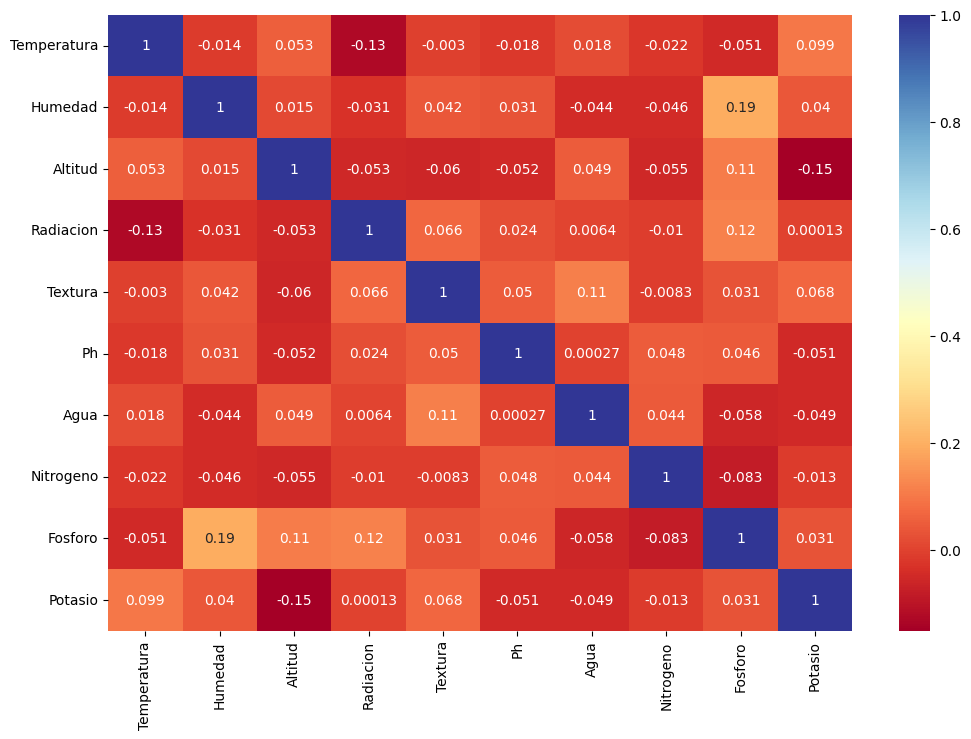

<Figure size 800x600 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calcula la matriz de correlación
matriz_correlacion = dataNumerico.corr()

# Crea el mapa de calor con la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap="RdYlBu")

# Ajusta el tamaño de la figura
plt.figure(figsize=(8, 6))

# Muestra el gráfico
plt.show()


In [ ]:
# Paso 1: Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



# Paso 2: Seleccionar las variables predictoras y la variable objetivo
X = dataNumerico.drop('Riesgo', axis=1)
y = dataNumerico['Riesgo']

# Paso 3: Aplicar la codificación one-hot a las variables categóricas
X = pd.get_dummies(X)

# Paso 4: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Crear un objeto de modelo de árbol de decisión y ajustarlo con el conjunto de entrenamiento
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Paso 6: Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Paso 7: Calcular la matriz de confusión y la precisión del modelo
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Matriz de confusión:')
print(conf_matrix)
print('Precisión del modelo: %.2f' % (accuracy * 100))


Matriz de confusión:
[[13  0  3]
 [ 0 25  0]
 [ 3  0  2]]
Precisión del modelo: 86.96


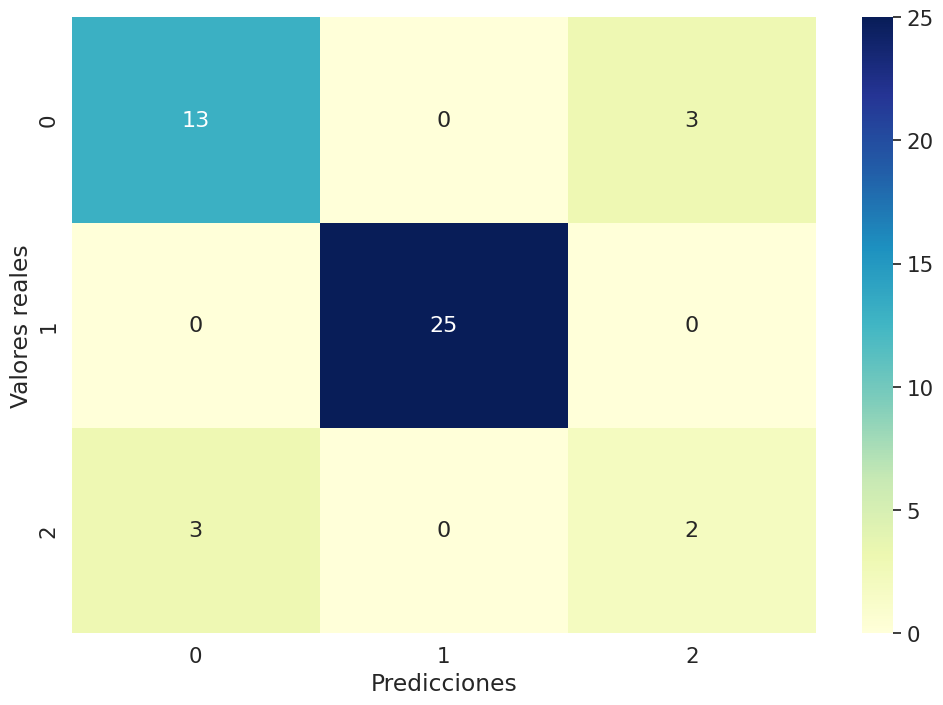

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4) # ajustar el tamaño de fuente
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", fmt='g') # crear el mapa de calor
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show() # mostrar el gráfico


# **RandomForestClassifier**

In [ ]:
data

,Pais,Departamento,Ciudad,Empresa,Finca,Agricultor,Planta,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio
0,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,25,78,2173,5,56,8,40,26,28,31
1,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,27,59,1957,8,43,8,19,28,34,32
2,Colombia,Antioquia,Jardin,FederacionNacionaldeCafeteros,ElHuerto,YamithRodriguez,Cafe,20,64,1841,3,33,7,23,10,30,38
3,Colombia,Antioquia,Jerico,FederacionNacionaldeCafeteros,ElDescanso,OscarBoada,Cafe,28,58,1660,10,63,7,48,12,32,44
4,Colombia,Antioquia,Fredonia,FederacionNacionaldeCafeteros,LasMargaritas,OrlandoCastañeda,Cafe,29,55,1775,1,58,5,14,29,23,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Colombia,Risaralda,Quinchia,FederacionNacionaldeCafeteros,LosOlmos,JairoGarcia,Cafe,20,70,1958,4,70,6,46,25,30,20
223,Colombia,Risaralda,Dosquebradas,FederacionNacionaldeCafeteros,LosAguilones,EucarioChaparro,Cafe,20,57,1768,9,50,5,36,31,37,29
224,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,27,65,2056,10,46,5,45,22,32,39
225,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,30,54,1711,1,41,8,29,36,33,28


Este código realiza el agrupamiento de datos utilizando el algoritmo K-means y luego agrega las etiquetas de riesgo a un conjunto de datos

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Seleccionar las características relevantes para el agrupamiento
X = data[['Temperatura', 'Humedad', 'Altitud', 'Radiacion', 'Textura', 'Ph', 'Agua', 'Nitrogeno', 'Fosforo', 'Potasio']]

# Crear un modelo de agrupamiento K-means
kmeans = KMeans(n_clusters=2)  # Especifica el número de clústeres deseado

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas asignadas a cada instancia
labels = kmeans.labels_

# Agregar las etiquetas de riesgo al conjunto de datos original
data['Riesgo'] = labels

# Guardar el conjunto de datos con las etiquetas de riesgo
data.to_csv('tu_archivo_con_etiquetas.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data.head(5)

,Pais,Departamento,Ciudad,Empresa,Finca,Agricultor,Planta,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio,Riesgo
0,Colombia,Antioquia,CiudadBolivar,FederacionNacionaldeCafeteros,LaMartina,SantiagoChaparro,Cafe,25,78,2173,5,56,8,40,26,28,31,1
1,Colombia,Antioquia,Andes,FederacionNacionaldeCafeteros,LasMagnolias,Alejandro Hernandez,Cafe,27,59,1957,8,43,8,19,28,34,32,1
2,Colombia,Antioquia,Jardin,FederacionNacionaldeCafeteros,ElHuerto,YamithRodriguez,Cafe,20,64,1841,3,33,7,23,10,30,38,0
3,Colombia,Antioquia,Jerico,FederacionNacionaldeCafeteros,ElDescanso,OscarBoada,Cafe,28,58,1660,10,63,7,48,12,32,44,0
4,Colombia,Antioquia,Fredonia,FederacionNacionaldeCafeteros,LasMargaritas,OrlandoCastañeda,Cafe,29,55,1775,1,58,5,14,29,23,34,0



Este código utiliza las bibliotecas pandas, seaborn y matplotlib para calcular y visualizar la matriz de correlación de un conjunto de datos.

<ipython-input-31-031b5305f24d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = data.corr()


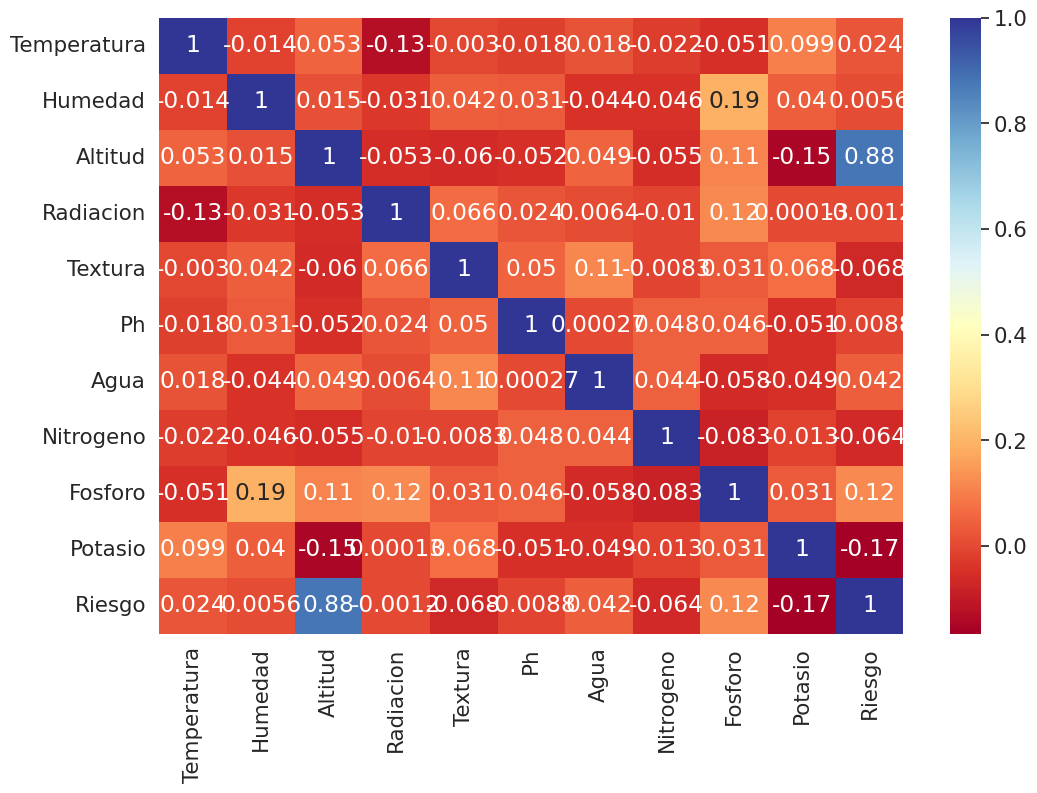

<Figure size 800x600 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
matriz_correlacion = data.corr()

# Crea el mapa de calor con la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap="RdYlBu")

# Ajusta el tamaño de la figura
plt.figure(figsize=(8, 6))

# Muestra el gráfico
plt.show()



Este codigo manda a la base de datos el DataSet

In [ ]:
import mysql.connector
import numpy as np

# Establecer la conexión con la base de datos
cnx = mysql.connector.connect(user='sql10617343', password='37AKABTRf1',
                              host='sql10.freesqldatabase.com', database='sql10617343')
cursor = cnx.cursor()

# Truncar la tabla
truncate_query = '''
TRUNCATE TABLE DataSet_Riesgos2
'''
cursor.execute(truncate_query)

# Insertar nuevos datos
for i in range(len(data)):
    insert_query = '''
    INSERT INTO DataSet_Riesgos2 (
        Pais, Departamento, Ciudad, Empresa, Finca, Agricultor, Planta,
        Temperatura, Humedad, Altitud, Radiacion, Textura, Ph, Agua,
        Nitrogeno, Fosforo, Potasio, Riesgo
    ) VALUES (
        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
    )
    '''
    values = tuple(map(lambda x: int(x) if isinstance(x, np.integer) else x, data.loc[i]))
    cursor.execute(insert_query, values)

# Confirmar los cambios y cerrar la conexión
cnx.commit()
cursor.close()
cnx.close()


Aqui eliminamos las varibles que no contengan datos, para ver el modelo de RandomForestClassifier

In [ ]:
data = data.drop(['Pais','Departamento', 'Ciudad', 'Empresa', 'Finca', 'Agricultor', 'Planta'], axis=1)

In [ ]:
data

,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio,Riesgo
0,25,78,2173,5,56,8,40,26,28,31,1
1,27,59,1957,8,43,8,19,28,34,32,1
2,20,64,1841,3,33,7,23,10,30,38,0
3,28,58,1660,10,63,7,48,12,32,44,0
4,29,55,1775,1,58,5,14,29,23,34,0
...,...,...,...,...,...,...,...,...,...,...,...
222,20,70,1958,4,70,6,46,25,30,20,1
223,20,57,1768,9,50,5,36,31,37,29,0
224,27,65,2056,10,46,5,45,22,32,39,1
225,30,54,1711,1,41,8,29,36,33,28,0


 aqui se dividen los datos en conjuntos de entrenamiento y prueba, entrenando un modelo de clasificación utilizando Random Forest, y realiza predicciones en el conjunto de prueba y evalúa la precisión del modelo.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('Riesgo', axis=1)
y = data['Riesgo']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de clasificación (por ejemplo, Random Forest)
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 1.0


este codigo para visualizar la matriz de confusión, que es una herramienta para evaluar el desempeño de un modelo de clasificación. El mapa de calor muestra la cantidad de clasificaciones correctas e incorrectas del modelo, permitiendo analizar los errores cometidos y la precisión en las predicciones.

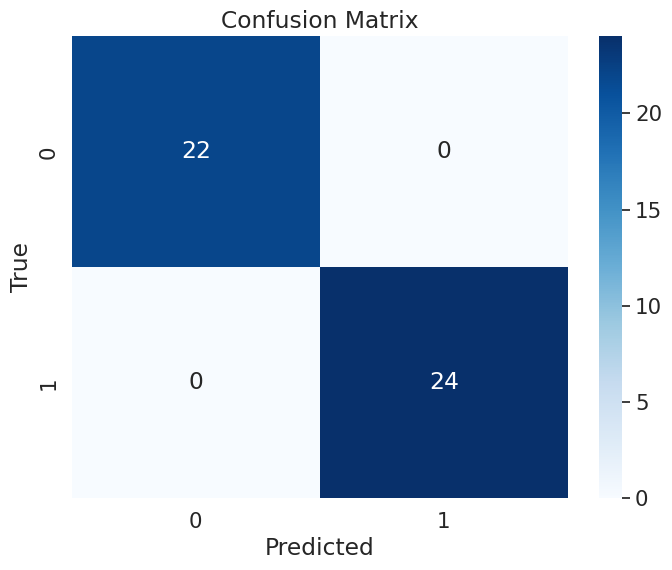

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Explorar la importancia de las características:

In [ ]:
importance = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


       Feature  Importance
2      Altitud    0.801587
8      Fosforo    0.039941
9      Potasio    0.031720
6         Agua    0.025402
4      Textura    0.024242
1      Humedad    0.021635
7    Nitrogeno    0.021028
3    Radiacion    0.017559
0  Temperatura    0.011844
5           Ph    0.005043


Evaluar otras métricas de rendimiento:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

Confusion Matrix:
[[22  0]
 [ 0 24]]


Ajustar hiperparámetros del modelo (ejemplo con búsqueda en cuadrícula):

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores hiperparámetros:", best_params)
print("Precisión del mejor modelo:", best_model.score(X_test, y_test))


Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Precisión del mejor modelo: 1.0


# **Gradient Boosting utilizando XGBoost**

Instalamos xgboost

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importamos librerias

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


este código divide los datos en conjuntos de características (X) y etiquetas (y), y luego separa esos conjuntos en conjuntos de entrenamiento y prueba utilizando la función train_test_split. Esta división es útil para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

In [ ]:
X = data.drop('Riesgo', axis=1)
y = data['Riesgo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


estas dos líneas de código crean y entrenan un modelo de clasificación XGBoost utilizando los conjuntos de entrenamiento X_train y y_train.

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

estas líneas de código calculan y muestran la precisión del modelo de clasificación en los datos de prueba

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 1.0


calcular y mostrar otras métricas de evaluación del modelo:

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



Utilizar validación cruzada:
Aplica validación cruzada k-fold utilizando la función cross_val_score de sklearn.model_selection para evaluar el rendimiento del modelo:

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())


Cross-Validation Scores: [1.         0.97826087 1.         1.         1.        ]
Mean Cross-Validation Score: 0.9956521739130434


Ajustar hiperparámetros:
Experimenta con diferentes configuraciones de hiperparámetros utilizando la función GridSearchCV de sklearn.model_selection para buscar la mejor combinación de valores:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.9944444444444445


este genera una curva de aprendizaje para evaluar el rendimiento del modelo en función del tamaño del conjunto de entrenamiento.

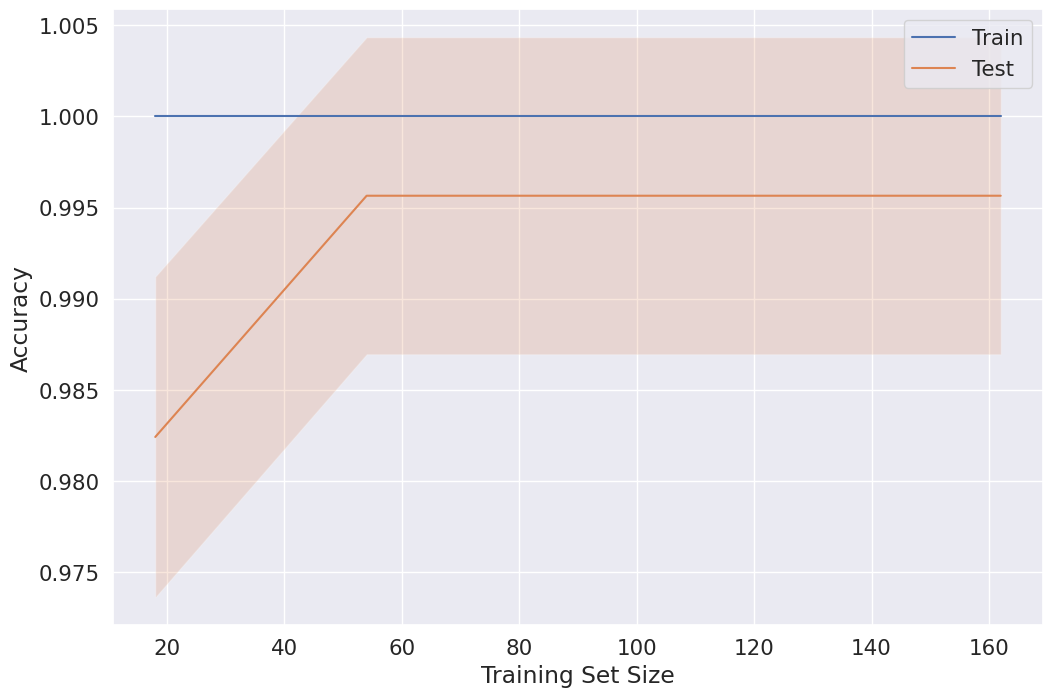

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define los tamaños de entrenamiento para la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5, scoring='accuracy')

# Calcula las medias y desviaciones estándar de los puntajes de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Grafica la curva de aprendizaje
plt.plot(train_sizes, train_mean, label='Train')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Test')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Este es un gráfico de dispersión que compara los valores reales y los valores predichos por el modelo

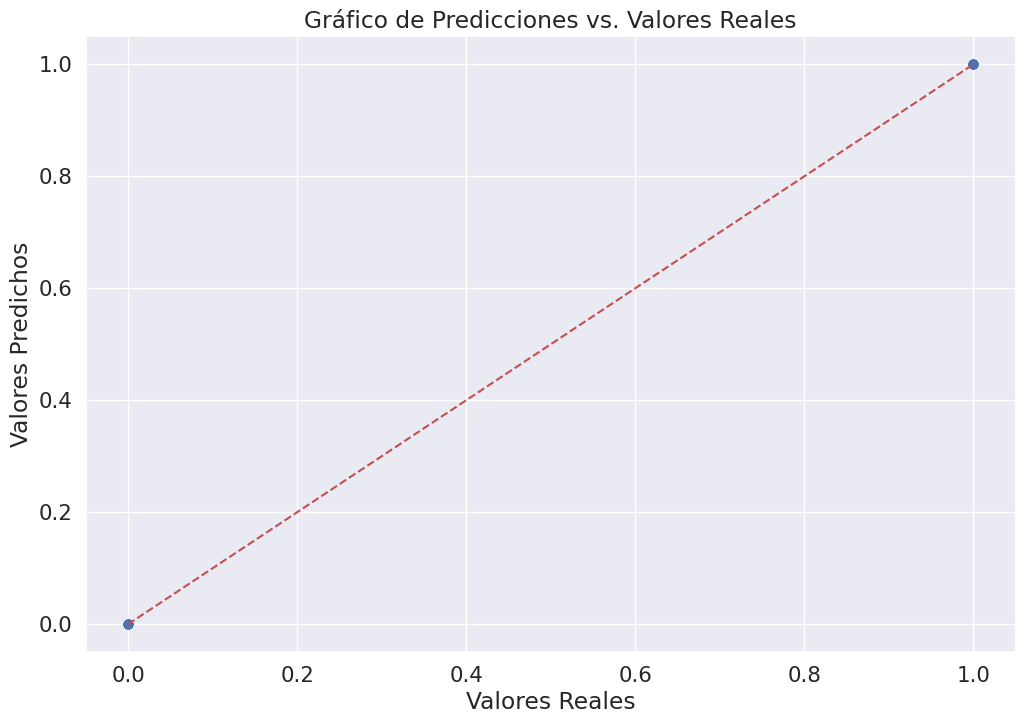

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gráfico de Predicciones vs. Valores Reales')
plt.show()



Este código genera una curva ROC (Receiver Operating Characteristic) para evaluar el rendimiento de un modelo

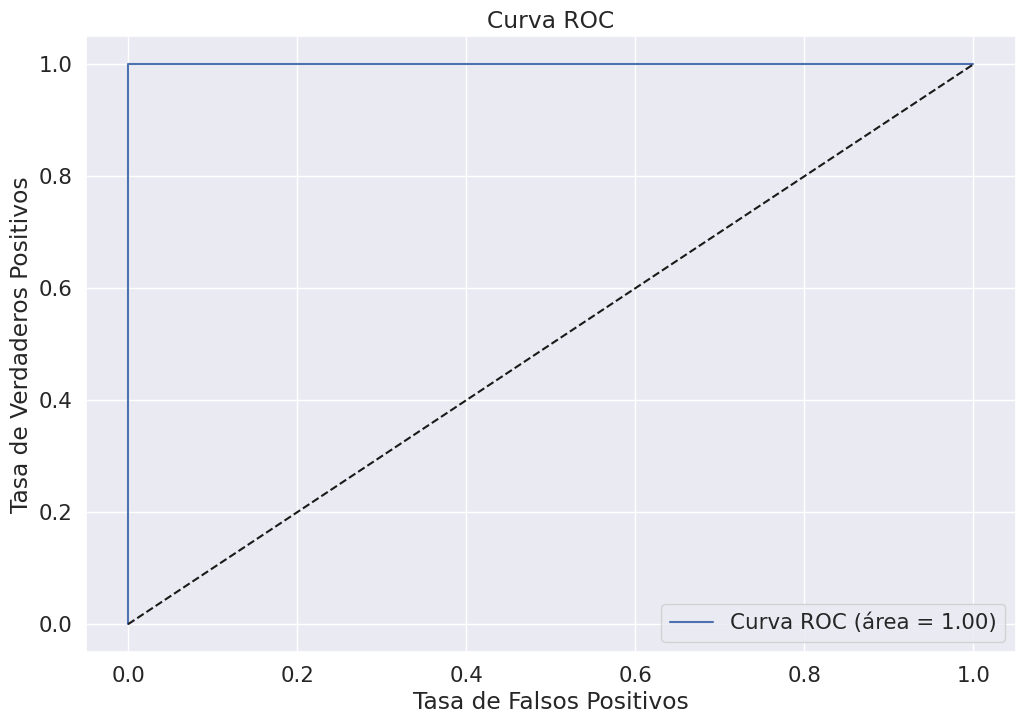

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para referencia
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()



# **Regresion lineal**

In [ ]:
data

,Temperatura,Humedad,Altitud,Radiacion,Textura,Ph,Agua,Nitrogeno,Fosforo,Potasio,Riesgo
0,25,78,2173,5,56,8,40,26,28,31,1
1,27,59,1957,8,43,8,19,28,34,32,1
2,20,64,1841,3,33,7,23,10,30,38,0
3,28,58,1660,10,63,7,48,12,32,44,0
4,29,55,1775,1,58,5,14,29,23,34,0
...,...,...,...,...,...,...,...,...,...,...,...
222,20,70,1958,4,70,6,46,25,30,20,1
223,20,57,1768,9,50,5,36,31,37,29,0
224,27,65,2056,10,46,5,45,22,32,39,1
225,30,54,1711,1,41,8,29,36,33,28,0


Importamos  librerias

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


este código realiza una regresión lineal, divide los datos en conjuntos de entrenamiento y prueba, ajusta el modelo a los datos de entrenamiento, realiza predicciones utilizando los datos de prueba y evalúa el rendimiento del modelo utilizando el coeficiente de determinación (R2) y el error cuadrático medio (MSE).

In [ ]:
X = data.drop("Riesgo", axis=1)  # Características
y = data["Riesgo"]  # Variable objetivo

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Crear una instancia del modelo de regresión lineal
regression = LinearRegression()

#Ajustar el modelo a los datos de entrenamiento
regression.fit(X_train, y_train)

#Realizar predicciones utilizando los datos de prueba
y_pred = regression.predict(X_test)

#Evaluar el rendimiento del modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficiente de determinación (R2):", r2)
print("Error cuadrático medio (MSE):", mse)

Coeficiente de determinación (R2): 0.7039912552649858
Error cuadrático medio (MSE): 0.07386229547263114


este código crea un gráfico de barras que muestra los coeficientes de la regresión lineal, lo cual proporciona información sobre la influencia de cada variable en la predicción de la variable objetivo. El gráfico permite visualizar de manera comparativa la importancia relativa de cada variable en el modelo de regresión lineal

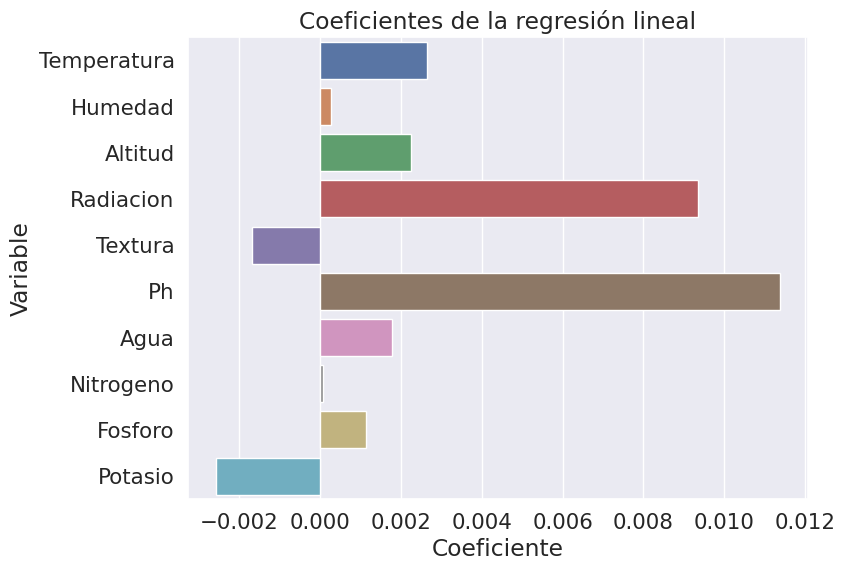

In [ ]:

# Visualizar los coeficientes
coeficients = pd.DataFrame({'Variable': X.columns, 'Coeficiente': regression.coef_})
plt.figure(figsize=(8, 6))
sns.barplot(x='Coeficiente', y='Variable', data=coeficients)
plt.title("Coeficientes de la regresión lineal")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.show()



 crea un gráfico de dispersión de los residuos de la regresión lineal. Los residuos representan la diferencia entre los valores reales y los valores predichos por el modelo. Este gráfico permite visualizar la distribución y patrones de los residuos, lo cual es útil para evaluar la calidad del ajuste del modelo y la presencia de posibles violaciones de las suposiciones de la regresión lineal, como la linealidad y la homocedasticidad.

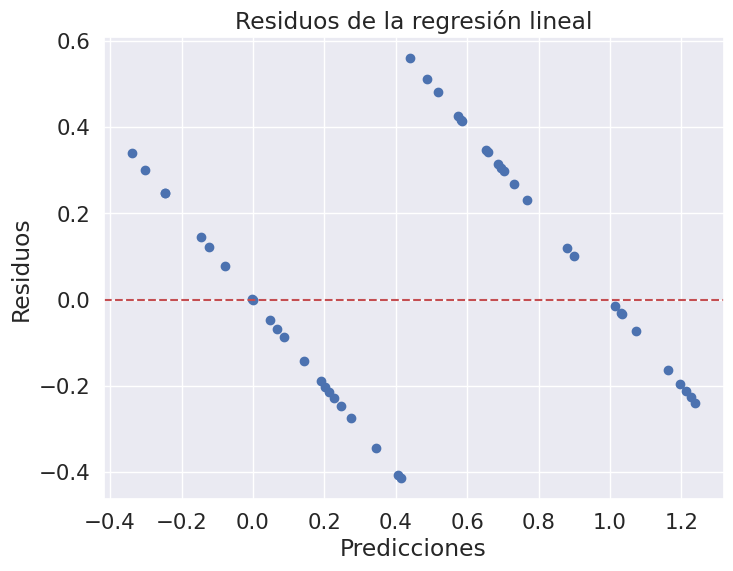

In [ ]:
# Visualizar los residuos
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.title("Residuos de la regresión lineal")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


visualiza las predicciones del modelo de regresión lineal en comparación con los valores reales de la variable objetivo. El gráfico permite evaluar visualmente la precisión del modelo y la cercanía de las predicciones a los valores reales. La línea diagonal representa el caso ideal donde las predicciones coinciden exactamente con los valores reales.

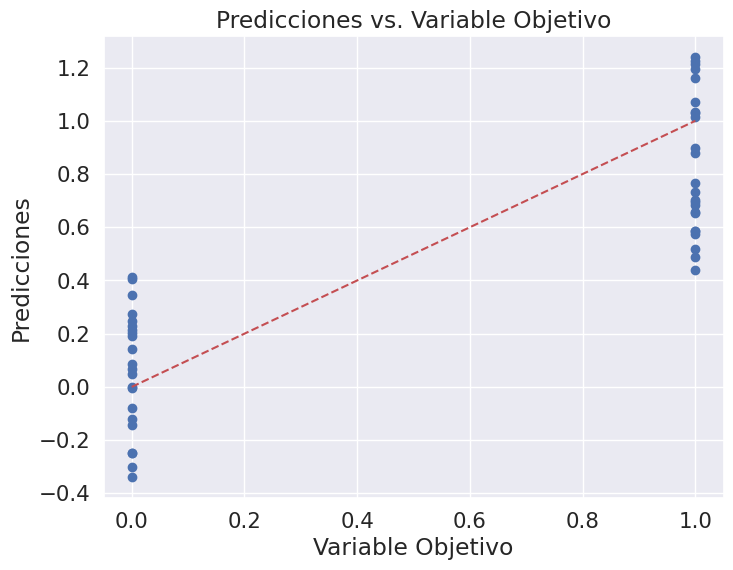

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicciones vs. Variable Objetivo")
plt.xlabel("Variable Objetivo")
plt.ylabel("Predicciones")
plt.show()


muestra la distribución de los residuos de la regresión lineal mediante un histograma. El histograma permite visualizar la frecuencia de los diferentes valores de los residuos y la forma de su distribución.

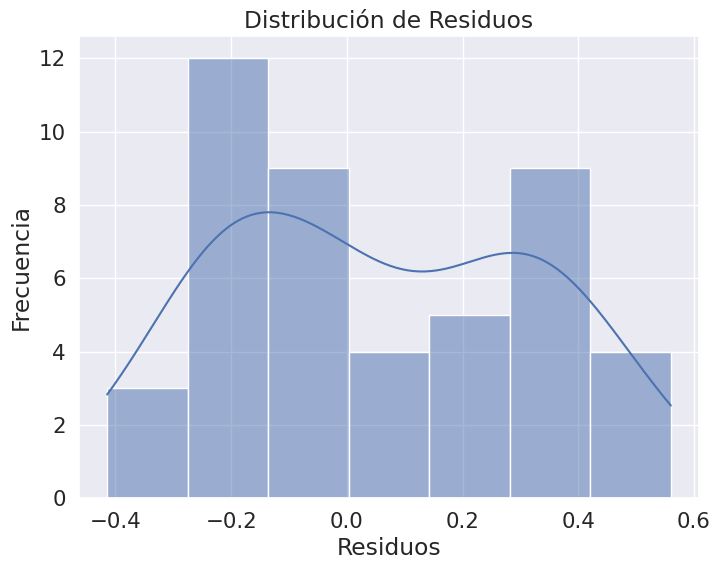

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribución de Residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()


este código permite obtener los coeficientes ordenados por importancia en un modelo de regresión lineal y realizar selección de características utilizando RFE. La selección de características se basa en la importancia de los coeficientes del modelo y se muestra en la consola las características seleccionadas.

In [ ]:
# Obtener los coeficientes y ordenarlos por importancia
coeficients_sorted = coeficients.sort_values(by='Coeficiente', ascending=False)

# Imprimir los coeficientes ordenados por importancia
print(coeficients_sorted)

# Selección de características utilizando Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

selector = RFE(regression, n_features_to_select=5)  # Número de características a seleccionar
selector.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X.columns[selector.support_]

# Imprimir las características seleccionadas
print("Características seleccionadas:", selected_features)


      Variable  Coeficiente
5           Ph     0.011373
3    Radiacion     0.009352
0  Temperatura     0.002651
2      Altitud     0.002248
6         Agua     0.001767
8      Fosforo     0.001133
1      Humedad     0.000264
7    Nitrogeno     0.000083
4      Textura    -0.001675
9      Potasio    -0.002576
Características seleccionadas: Index(['Temperatura', 'Altitud', 'Radiacion', 'Ph', 'Potasio'], dtype='object')


este código realiza una búsqueda exhaustiva de los mejores hiperparámetros para el modelo de regresión lineal utilizando GridSearchCV. Se muestra en la consola los mejores hiperparámetros encontrados. Esto permite encontrar la combinación de hiperparámetros que maximiza el rendimiento del modelo de regresión lineal.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a probar
parameters = {'fit_intercept': [True, False]}

# Realizar búsqueda exhaustiva de los mejores hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(regression, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", best_params)


Mejores hiperparámetros: {'fit_intercept': True}
